# Simple KMean Clustering 

In [79]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn import metrics

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")


In [80]:
iris_df= pd.read_csv("datasets/iris.csv",
                     skiprows=1,
                     names=['sepal-length',
                            'sepal-width',
                            'petal-length',
                            'petal-width',
                            'Class'])

iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [81]:
iris_df= iris_df.sample(frac=1).reset_index(drop=True)
iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.9,3.0,4.2,1.5,Iris-versicolor
1,6.4,2.7,5.3,1.9,Iris-virginica
2,5.1,3.4,1.5,0.2,Iris-setosa
3,6.7,3.0,5.0,1.7,Iris-versicolor
4,5.0,2.3,3.3,1.0,Iris-versicolor


In [82]:
iris_df.shape

(150, 5)

In [83]:
iris_df.columns.unique()

Index(['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class'], dtype='object')

In [84]:
from sklearn import preprocessing

label_encoding= preprocessing.LabelEncoder()

iris_df['Class']= label_encoding.fit_transform(iris_df['Class']).astype(int)

In [85]:
iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.9,3.0,4.2,1.5,1
1,6.4,2.7,5.3,1.9,2
2,5.1,3.4,1.5,0.2,0
3,6.7,3.0,5.0,1.7,1
4,5.0,2.3,3.3,1.0,1


## Exploring data with Visualization

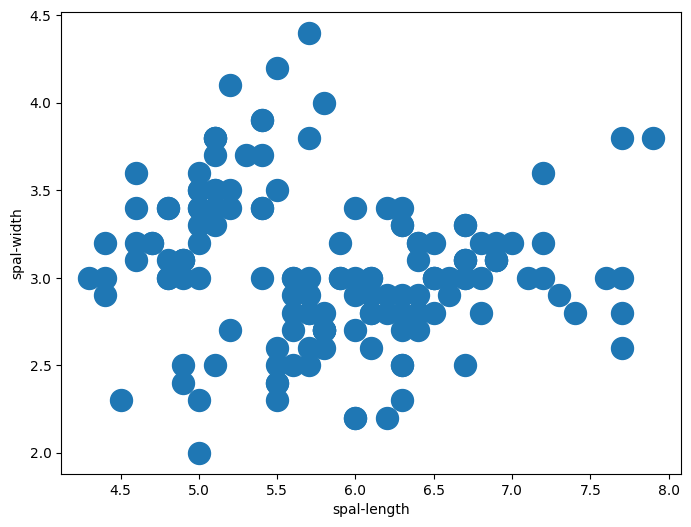

In [86]:
fig, ax= plt.subplots(figsize=(8,6))

plt.scatter(iris_df['sepal-length'],iris_df['sepal-width'],s=250)

plt.xlabel('spal-length')
plt.ylabel('spal-width')
plt.show()

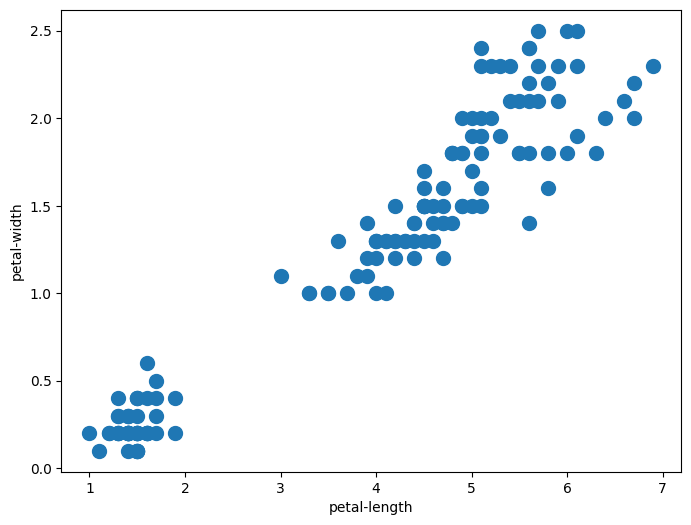

In [87]:
fig, ax= plt.subplots(figsize=(8,6))

plt.scatter(iris_df['petal-length'],iris_df['petal-width'],s=100)

plt.xlabel('petal-length')
plt.ylabel('petal-width')

plt.show()

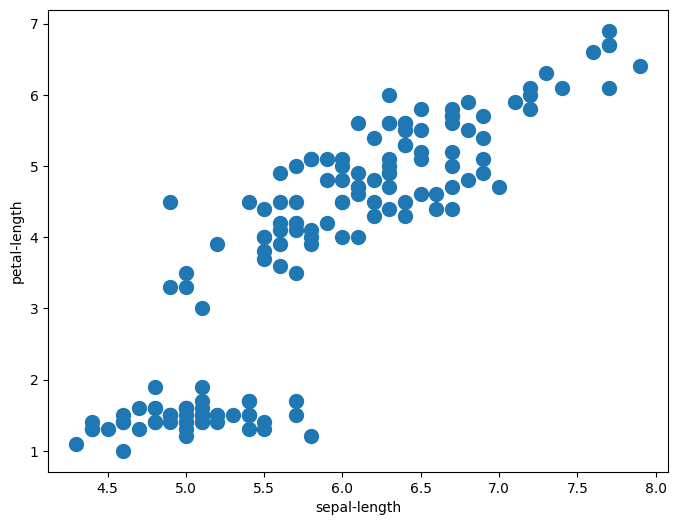

In [88]:
fig, ax= plt.subplots(figsize=(8,6))

plt.scatter(iris_df['sepal-length'],iris_df['petal-length'],s=100)

plt.xlabel('sepal-length')
plt.ylabel('petal-length')

plt.show()

## Perform K-mean with 2 Features

In [89]:
iris_2D= iris_df[['sepal-length','petal-length']]

iris_2D.sample(5)

,sepal-length,petal-length
43,5.8,5.1
10,5.5,1.3
30,5.1,1.9
113,5.3,1.5
58,5.7,5.0


In [90]:
iris_2D.shape

(150, 2)

In [91]:
iris_2D=np.array(iris_2D)

In [92]:
kmean_model_2D=KMeans(n_clusters=3,max_iter=1000).fit(iris_2D)

In [93]:
kmean_model_2D.labels_

array([2, 1, 0, 1, 2, 1, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 1, 0, 1, 1, 1,
       0, 2, 1, 2, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 2, 0, 0, 1, 2, 2, 1, 2,
       2, 2, 1, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1, 0,
       2, 1, 2, 1, 2, 1, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 1,
       0, 0, 0, 0, 2, 1, 0, 2, 0, 2, 0, 0, 1, 2, 2, 1, 2, 0, 0, 1, 0, 1,
       1, 2, 1, 2, 1, 0, 1, 2, 2, 2, 1, 1, 1, 0, 0, 2, 2, 1], dtype=int32)

In [94]:
centroids_2D= kmean_model_2D.cluster_centers_
centroids_2D


array([[5.00784314, 1.49411765],
       [6.83902439, 5.67804878],
       [5.87413793, 4.39310345]])

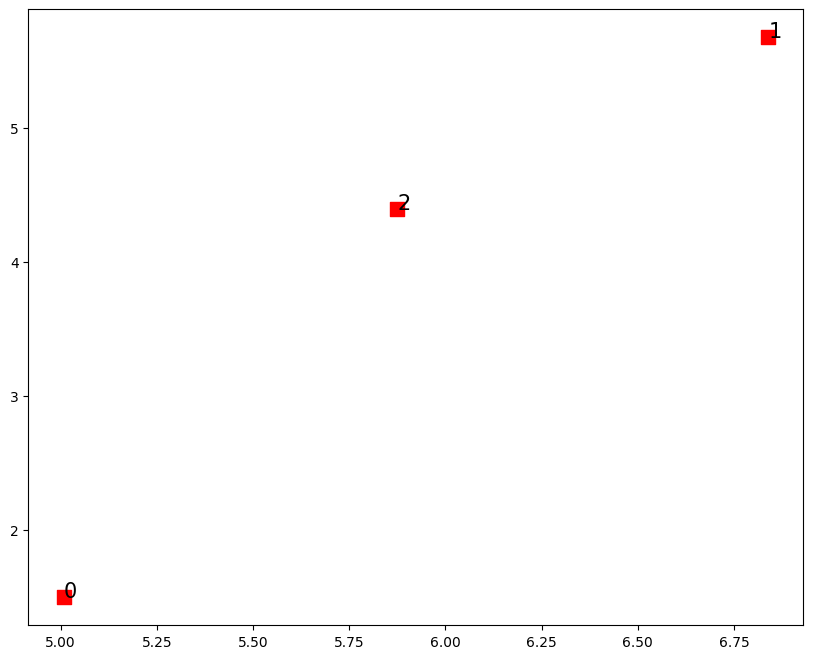

In [95]:
fig, ax= plt.subplots(figsize=(10,8))

plt.scatter(centroids_2D[:,0],centroids_2D[:,1],c='r',s=100,marker='s')

for i in range(len(centroids_2D)):
    plt.annotate(i,(centroids_2D[i][0],centroids_2D[i][1]),fontsize=15)

In [96]:
iris_lable= iris_df['Class']

In [97]:
print("Homogenity Score : " , metrics.homogeneity_score(iris_lable,kmean_model_2D.labels_))
print("Completeness Score : ", metrics.completeness_score(iris_lable,kmean_model_2D.labels_))

print("V_Measure Score : ",metrics.v_measure_score(iris_lable,kmean_model_2D.labels_) )

print("Adjust_rand Score : " ,metrics.adjusted_rand_score(iris_lable,kmean_model_2D.labels_))
print("Adjust_mutual Score : ",metrics.adjusted_mutual_info_score(iris_lable,kmean_model_2D.labels_))

## Note all of them require the true lable expect Silhouette 

print("Silhouette Score : ",metrics.silhouette_score(iris_2D,kmean_model_2D.labels_))

Homogenity Score :  0.7033177646052958
Completeness Score :  0.7096993707802843
V_Measure Score :  0.706494157075837
Adjust_rand Score :  0.6988627672348092
Adjust_mutual Score :  0.7028024531409134
Silhouette Score :  0.5890612473759282


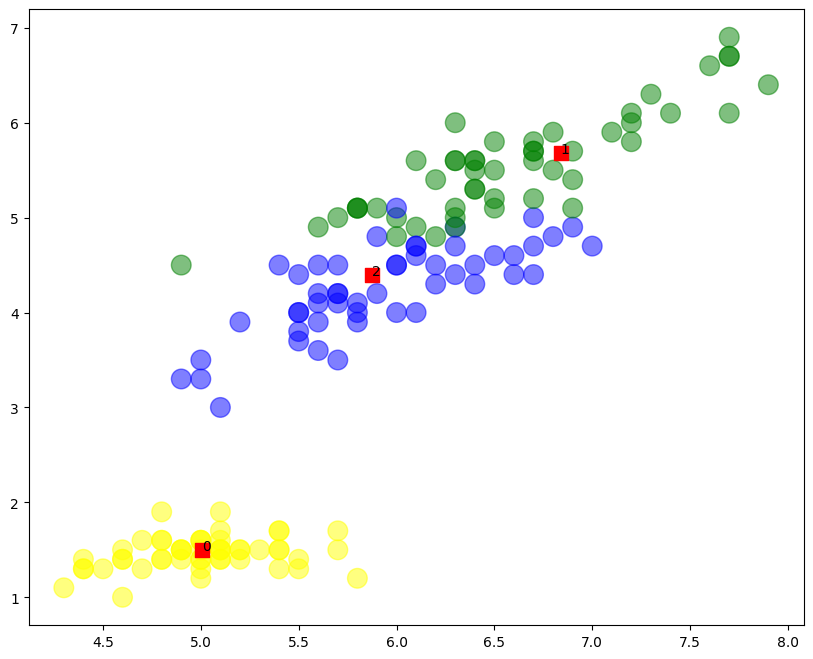

In [102]:
colors=['yellow','blue','green']

plt.figure(figsize=(10,8))

plt.scatter(iris_df['sepal-length'],iris_df['petal-length'],c=iris_df['Class'],s=200,
            cmap=matplotlib.colors.ListedColormap(colors),alpha=0.5)

plt.scatter(centroids_2D[:,0],centroids_2D[:,1],c='r',s=100,marker='s')

for i in range(len(centroids_2D)):
    plt.annotate(i,(centroids_2D[i][0], centroids_2D[i][1]), fontsize=10)

## K-mean with all Features

In [103]:
iris_feature= iris_df.drop('Class',axis=1)

iris_feature.head()

,sepal-length,sepal-width,petal-length,petal-width
0,5.9,3.0,4.2,1.5
1,6.4,2.7,5.3,1.9
2,5.1,3.4,1.5,0.2
3,6.7,3.0,5.0,1.7
4,5.0,2.3,3.3,1.0


In [104]:
iris_lable=iris_df['Class']

iris_lable.sample(5) 

27    1
15    1
71    2
56    2
26    1
Name: Class, dtype: int64

In [105]:
kmeans_model= KMeans(n_clusters=3).fit(iris_feature)

In [106]:
kmeans_model.labels_

array([1, 2, 0, 2, 1, 2, 1, 2, 2, 0, 0, 1, 2, 1, 1, 1, 0, 2, 0, 2, 2, 2,
       0, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 1, 1, 2, 1,
       1, 1, 2, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 2, 0, 2, 2, 2, 2, 0,
       0, 1, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0,
       1, 2, 1, 2, 1, 2, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 2,
       0, 0, 0, 0, 1, 2, 0, 1, 0, 1, 1, 0, 2, 1, 1, 2, 1, 0, 0, 2, 0, 2,
       2, 1, 2, 1, 2, 0, 2, 1, 1, 1, 2, 2, 2, 0, 0, 1, 1, 2], dtype=int32)

In [107]:
kmeans_model.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [108]:
print("Homogenity Score : " , metrics.homogeneity_score(iris_lable,kmeans_model.labels_))
print("Completeness Score : ", metrics.completeness_score(iris_lable,kmeans_model.labels_))

print("V_Measure Score : ",metrics.v_measure_score(iris_lable,kmeans_model.labels_) )

print("Adjust_rand Score : " ,metrics.adjusted_rand_score(iris_lable,kmeans_model.labels_))
print("Adjust_mutual Score : ",metrics.adjusted_mutual_info_score(iris_lable,kmeans_model.labels_))


print("Silhouette Score : ",metrics.silhouette_score(iris_feature,kmeans_model.labels_))

Homogenity Score :  0.7514854021988338
Completeness Score :  0.7649861514489815
V_Measure Score :  0.7581756800057784
Adjust_rand Score :  0.7302382722834697
Adjust_mutual Score :  0.7551191675800484
Silhouette Score :  0.5525919445499757
